# Linear regression

Objective - predict the price of car dataset

## Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,122,122,122,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4
length,0.811148,0.811148,0.822681,0.84863,0.84863


Primeiro vamos dropar as features que não serão usadas para predizer a variável target - "price".

In [9]:
# lista = ['symboling', 'make', 'num-of-doors', 'body-sytle', 'height', 'num-of-cylinders', 'city-L/100km']
auto_df = df.drop(['symboling', 'make', 'num-of-doors', 'height', 'city-L/100km'], axis = 1)
auto_df.sample(5).T

,127,125,81,152,139
normalized-losses,122,122,122,91,102
aspiration,std,std,turbo,std,std
body-style,hatchback,convertible,hatchback,sedan,sedan
drive-wheels,fwd,rwd,fwd,fwd,fwd
engine-location,front,rear,front,front,front
wheel-base,96.1,89.5,95.9,95.7,97.2
length,0.849592,0.811629,0.832292,0.799135,0.826526
width,0.925,0.902778,0.920833,0.894444,0.908333
curb-weight,2460,2800,2926,2081,2340
engine-type,ohc,ohcf,ohc,ohc,ohcf


# Simple Linear Regression

<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

## Linear regression with one feature - engine-size 

__How could engine-size help us predict car price ?__

In [11]:
from sklearn.model_selection import train_test_split

X = auto_df[['engine-size']]
y = auto_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train.sample(5)

,engine-size
185,109
23,90
91,97
89,97
81,156


In [13]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(X_train, y_train)

print('Training score: ', linear_model.score(X_train, y_train))

Training score:  0.7566712363769901


In [14]:
y_hat = linear_model.predict(X_test)  # predictions - y_preds
y_hat[0:5]

array([[ 8468.83905442],
       [25073.52802615],
       [ 7727.55829675],
       [ 8617.09520595],
       [12026.98669122]])

#### What is the value of the intercept(a) ?

In [15]:
linear_model.intercept_

array([-5912.00764431])

#### What is the value of the Slope(b) ?

In [16]:
linear_model.coef_

array([[148.25615153]])

#### What is the final estimated linear model we get?
$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

__price = 148 - 5912.01 x engine-size__

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

print('Testing score: ', r2_score(y_test, y_hat))

Testing score:  0.7245780486466742


In [23]:
lm_mse = mean_squared_error(y_test, y_hat)
lm_rmse = np.sqrt(lm_mse)

print('The rmse calculated is {}'.format(lm_rmse))

The rmse calculated is 5804.910592267268


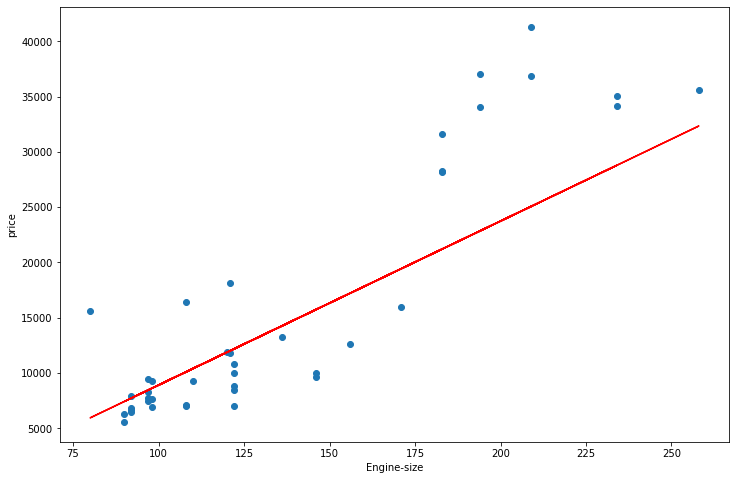

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X_test, y_test)
ax.plot(X_test, y_hat, color='r')

ax.set_xlabel('Engine-size')
ax.set_ylabel('price')
plt.show()

In [25]:
X = auto_df[['curb-weight']]
y = auto_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.sample(5)

,curb-weight
182,2275
198,3012
33,1956
197,3049
131,2758


In [26]:
lm = LinearRegression(normalize=True).fit(X_train, y_train)

print('Training score: ', lm.score(X_train, y_train))

Training score:  0.6964331481001391


In [27]:
print('The intercept is', lm.intercept_)


The intercept is [-16619.81866735]


In [29]:
print('The slope is :', lm.coef_)

The slope is : [[11.49588002]]


Plugging the actual values, we get:
    

price = -16619.81 + 11 x curb-weight

In [31]:
y_hat = lm.predict(X_test)
print('Testing score: ', r2_score(y_test, y_hat))

Testing score:  0.6502274641352856


In [32]:
lm_mse = mean_squared_error(y_test, y_hat)
lm_rmse = np.sqrt(lm_mse)

print('The rmse calculated is {}'.format(lm_rmse))

The rmse calculated is 6541.677237222641


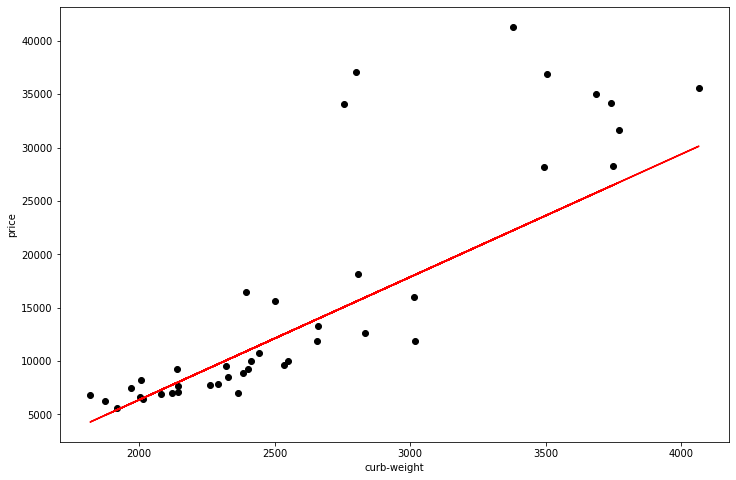

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X_test, y_test, color = 'k')
ax.plot(X_test, y_hat, color='r')

ax.set_xlabel('curb-weight')
ax.set_ylabel('price')
plt.show()

# Multiple Linear Regression

Para podermos predizer o preço do carro com mais de uma variável, nós devemos usar - __multiple linear regression__.

$$
yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

## Linear Regression with multiple features


In [35]:
X = auto_df[['horsepower', 'engine-size', 'highway-mpg', 'curb-weight']]
y = auto_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
lm = LinearRegression(normalize = True).fit(X_train, y_train)

In [38]:
print('Training score: ', lm.score(X_train, y_train))

Training score:  0.8088859577421141


In [41]:
predictors = X_train.columns
coef = pd.Series(lm.coef_, predictors).sort_values(ascending = True)
print(coef)

highway-mpg   -65.725397
curb-weight     3.777874
horsepower     25.940757
engine-size    83.147570
dtype: float64


In [42]:
lm.intercept_

-8009.2412081557395

What is the final estimated linear model that we get ?


__price = -8009.24 + 83.14 x engine-size + 25.94 x horsepower + 3.78 curb-weight  - 65.72 x highway-mpg__

In [46]:
y_hat = lm.predict(X_test)

# Compute and print r2 and RMSE
print('Testing score:   {}'.format(r2_score(y_test, y_hat)))
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print("Root Mean Squared Error:   {}".format(rmse))

Testing score:   0.7636515722189389
Root Mean Squared Error:   5377.403412631394


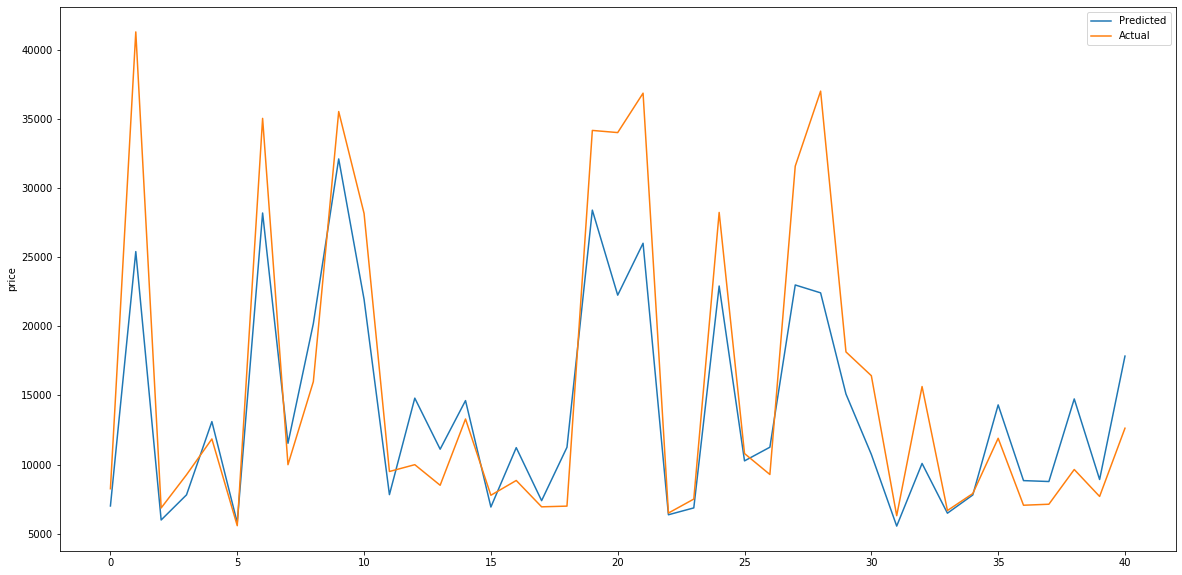

In [48]:
plt.figure(figsize = (20,10))

plt.plot(y_hat, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('price')

plt.legend()
plt.show()

### Residual Plot

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

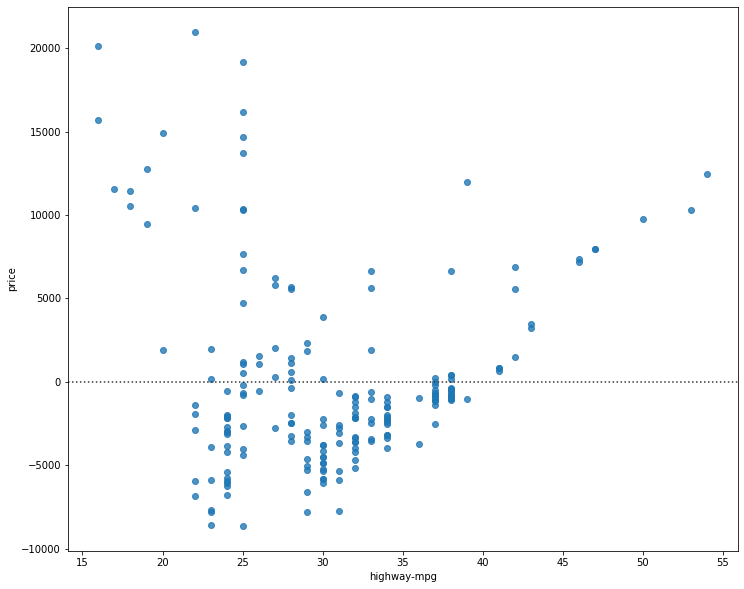

In [51]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

### Multiple Linear Regression

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

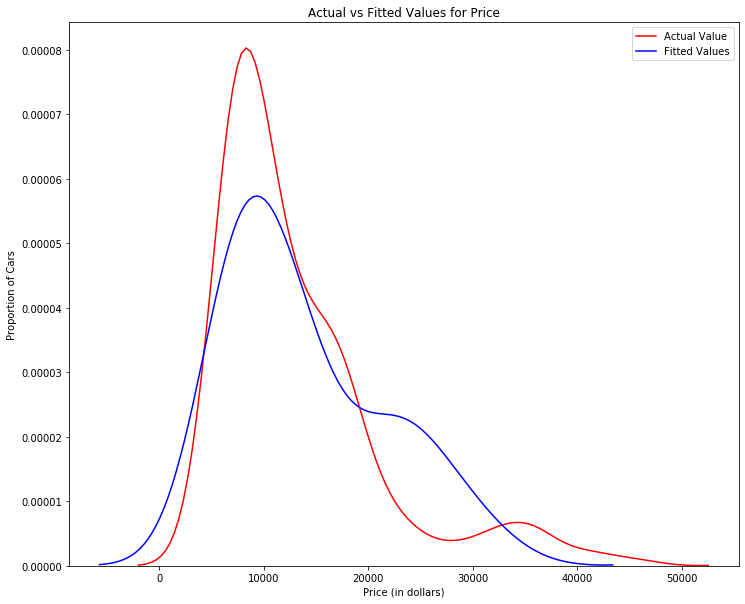

In [53]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>